<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/17_Course_3_Week_2_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [39]:
import tensorflow_datasets as tfds
print(tfds.__version__)

4.0.1


In [38]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The orginal string : {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The orginal string : TensorFlow, from basics to mastery


In [ ]:
for ts in tokenized_string :
  print('{} ---> {}'.format(ts, tokenizer.decode([ts])))

6307 ---> Ten
2327 ---> sor
4043 ---> Fl
2120 ---> ow
2 ---> , 
48 ---> from 
4249 ---> basi
4429 ---> cs 
7 ---> to 
2652 ---> master
8050 ---> y


In [ ]:
Buffer_Size = 10000
Batch_Size = 64

train_dataset = train_data.shuffle(Buffer_Size)
train_dataset = train_dataset.padded_batch(Batch_Size, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(Batch_Size, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(
    train_data,
    epochs = num_epochs,
    validation_data = test_data
)

Epoch 1/10
391/391 [==============================] - 15s 35ms/step - loss: 0.6874 - acc: 0.5612 - val_loss: 0.6307 - val_acc: 0.7658
Epoch 2/10
391/391 [==============================] - 14s 35ms/step - loss: 0.5746 - acc: 0.7804 - val_loss: 0.4379 - val_acc: 0.8398
Epoch 3/10
391/391 [==============================] - 14s 35ms/step - loss: 0.3853 - acc: 0.8606 - val_loss: 0.3555 - val_acc: 0.8678
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 0.3016 - acc: 0.8951 - val_loss: 0.3257 - val_acc: 0.8748
Epoch 5/10
391/391 [==============================] - 14s 34ms/step - loss: 0.2641 - acc: 0.9050 - val_loss: 0.3231 - val_acc: 0.8675
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 0.2279 - acc: 0.9202 - val_loss: 0.3227 - val_acc: 0.8675
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 0.2175 - acc: 0.9248 - val_loss: 0.3045 - val_acc: 0.8814
Epoch 8/10
391/391 [==============================] - 14s 35ms

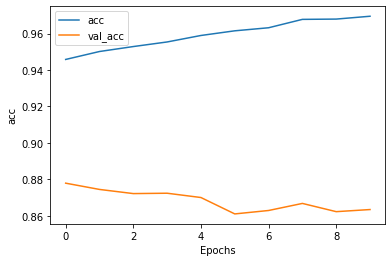

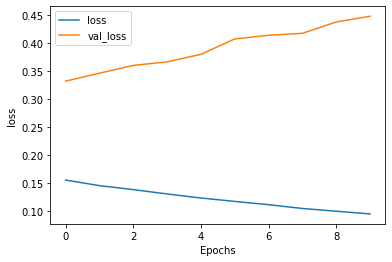

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string) :
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(8185, 64)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(1, tokenizer.vocab_size) :
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')

out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else :
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>